![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# Working With Open Data Part 4:  Meteorite Landings and Falls Part 1

In this third instalment of our open data tutorial series, we will be using a data set of the year and location of all recorded meteorite falls until the year 2013. This data is hosted at [this github repository](https://github.com/fleiser/Meteorite-landings/blob/master/Meteorite_Landings.csv). 


As this is the third instalment in the tutorial series, let's continue with our traditional first step and import the required libraries. Notice this time we're using a few more libraries than we have in the past. Not to worry, they're extra tools to make some visualizations a little more exciting. We have entered comments describing what each library is for, and we will explain how we're using them for when they come up in the tutorial. 

In [1]:
# These first three libraries are nothing new!
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Geopandas is very similar to pandas, however it contains extra functionality to work with 
# geospacial data such as latitude and longitude
import geopandas as gpd
# This imports the "Point" function, or a function that creates a point on a geospacial graph.
# this function simply makes things easier to work with in Pandas
from shapely.geometry import Point

# The following three libraries are included in order to make interactive widgets in this notebook.
# More on this later. 
from IPython import display
from ipywidgets import interact_manual
import ipywidgets as widgets



Don't worry too much about those new libraries. They will be considerably less intimidating once you see how they're like what we've already used!

## Gathering The Data

We now are ready to download the data from the Github site in the cell below. You'll notice that we've broken it into few more steps in the cell below. These are to make handling the data a little more straight forward. Their functionality is commented in the cell below for your convenience. 

In [2]:
'''
These first two lines should not be surprising anymore! This is how we've been bringing data into
our Jupyter notebooks throughout this tutorial series. 
'''
url = 'https://github.com/fleiser/Meteorite-landings/raw/master/Meteorite_Landings.csv'
landings = pd.read_csv(url)

'''
Here things are new and exciting. What the `pd.to_datetime' function does is convert some text that looks 
like a date into a 'datetime' object inside of pandas. This is convenient for parsing later as we will be able
to search by year, month, and day. We're also using errors = 'coerce', which tells python to ignore any data
points that cannot be coerced into a datetime object. You'll also note that we're redefining our pandas column
'year' in place
'''
landings['year'] = pd.to_datetime(landings['year'], errors = 'coerce')
print("Number of observed meteorites in data set:", len(landings))
landings.head()

Number of observed meteorites in data set: 45715


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"(-33.166670, -64.950000)"


You may notice that the 'year' column also contains months and days in our dataframe. You'll also notice that the date here is always January first. This is not the result of some great cosmic coincidence. The month and day linger as an artifact of the data set itself, and in fact the month and day in this data do not exist. As such, we will be ignoring those quantities in our later analysis. The month and date are not included maliciously - this is more than likely an artifact of date time conversions of the original data set. With the appearance of month and days, this data could be unintentionally misleading. 

# Creating a Map

Using the latitude and longitude of each meteor, awe can create a map which will allow us to observe the locations where meteorites have fallen or been discovered. To do that, we require `geopandas`, or "Geo-spacial pandas". Geopandas behaves near identically to the pandas, however it contains further functionality that makes creating maps more straight forward. Our first task is creating a geopandas data frame, which is done in the code cell below

In [3]:
# Here we're creating a function which defines our points that we will plot on a map
def create_point(row):
    '''
    Here 'row' is the row of a dataframe that we will use the apply() with this 
    function on. As well, reclong and reclat are the latitude and longitude from our landings 
    data frame. Finally, Point is the Point function that we imported in the beginning of the notebook
    So, all this functio does is return a Point object of latitude and longitude. Easy!
    
    '''
    return Point(row.reclong, row.reclat)

# Now, we create our points by using the apply function on our landings data frame 
points = landings.apply(create_point, axis=1)

print("Below is what our create_point function creates")
print()
print(points.head())

# We are now creating a geopandas data frame with a 'geometry' column as defined 
# by the points we just created. Besides that it is identical to our 'landings'
# data frame 

geo_landings = gpd.GeoDataFrame(landings, geometry=points)

# We also need to define the map projection we're using. In this case, epsg:4326 is the most 
# common projection for a rectangular map. 

geo_landings.crs = {'init': 'epsg:4326'}

# View the first rows, note our 'geometry' tab 
geo_landings.head()

Below is what our create_point function creates

0                 POINT (6.08333 50.775)
1     POINT (10.23333 56.18333000000001)
2         POINT (-113 54.21666999999999)
3    POINT (-99.90000000000001 16.88333)
4               POINT (-64.95 -33.16667)
dtype: object


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,geometry
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"(50.775000, 6.083330)",POINT (6.08333 50.775)
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"(56.183330, 10.233330)",POINT (10.23333 56.18333000000001)
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"(54.216670, -113.000000)",POINT (-113 54.21666999999999)
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"(16.883330, -99.900000)",POINT (-99.90000000000001 16.88333)
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"(-33.166670, -64.950000)",POINT (-64.95 -33.16667)


Now that we've created a geopandas data frame, let's take a look at plotting that on a map! First, let's create a simple world map, as done below

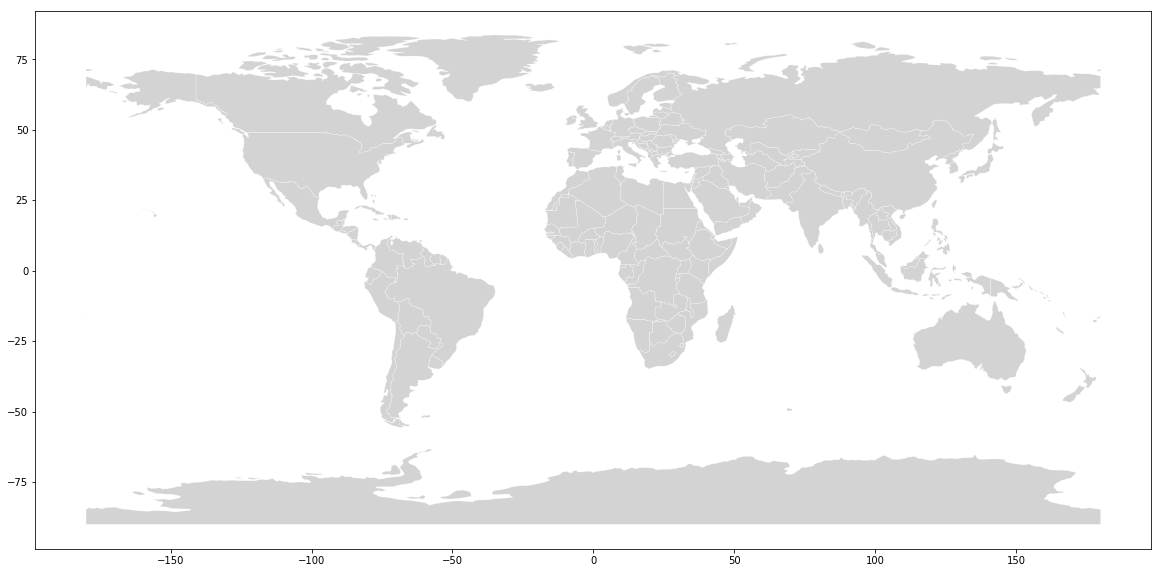

In [4]:
# This creates a world map for us! This data set is a part of geopands and included
# in the hub. 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Now we're just creating a plot as we've done using regular pandas data frames

ax = world.plot(figsize=(20,10), linewidth=0.25, edgecolor='white', color='lightgrey')

Now that we have a basic map, let's put our meteorite landings onto it

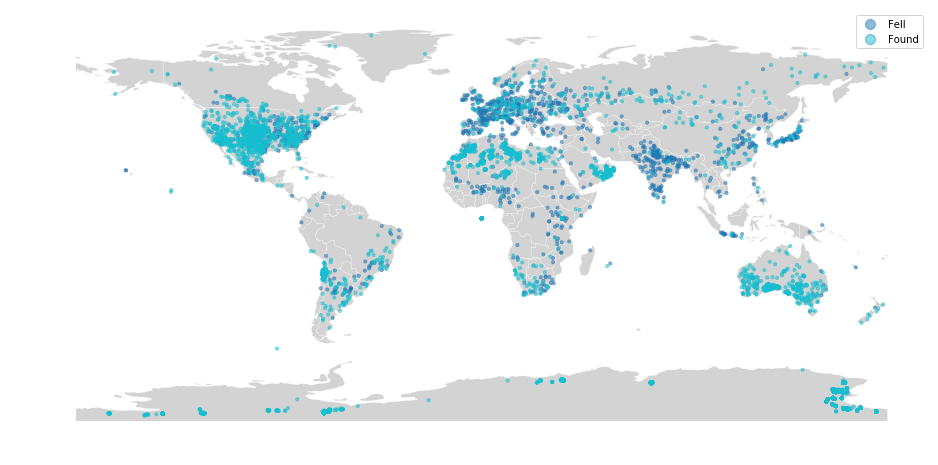

In [5]:

ax = world.plot(figsize=(16,10), linewidth=0.25, edgecolor='white', color='lightgrey')

# Because we have a 'geometry' column, geopandas will plot our meteorite landings without 
# us needing to specify which column to plot. However, we do need to specify that it should appear on the same 
# axis as 
geo_landings.plot(ax=ax, column='fall', alpha = 0.5, markersize=10, legend=True)
ax.axis('off')
plt.show()


Of course, there's around 45000 observed meteorites on the plot above. Which gets messy pretty quickly. It might be more interesting to view the meteorite falls and finds for each year. The easiest way to do this in a Jupyter notebook is by using interactive widgets, some of the libraries we imported earlier. Before we start  creating the widget, let's walk through how we would make a map of any year of interest first. The first order of business: how do we extract just the year from a date time column?

In [6]:
'''
To extract the year from a datetime object, we have to be aware of two methods:

dt   : This stands for "datetime" and is used to cast the text in our data frame into a datetime object

year : This extracts the year from the date time object

'''
# This is how we get just the year out!
print("Syntax 1 output:")
print( geo_landings["year"].dt.year.head() )
print()

# Note that this is equivalent, however the first ".year" is in reference to the column name
# and not a method of the date time object.
print("Syntax 2 output:")
print( geo_landings.year.dt.year.head() )

# If our 'year' column was called 'time', this would look like
# geo_landings.time.dt.year.head()


Syntax 1 output:
0    1880.0
1    1951.0
2    1952.0
3    1976.0
4    1902.0
Name: year, dtype: float64

Syntax 2 output:
0    1880.0
1    1951.0
2    1952.0
3    1976.0
4    1902.0
Name: year, dtype: float64


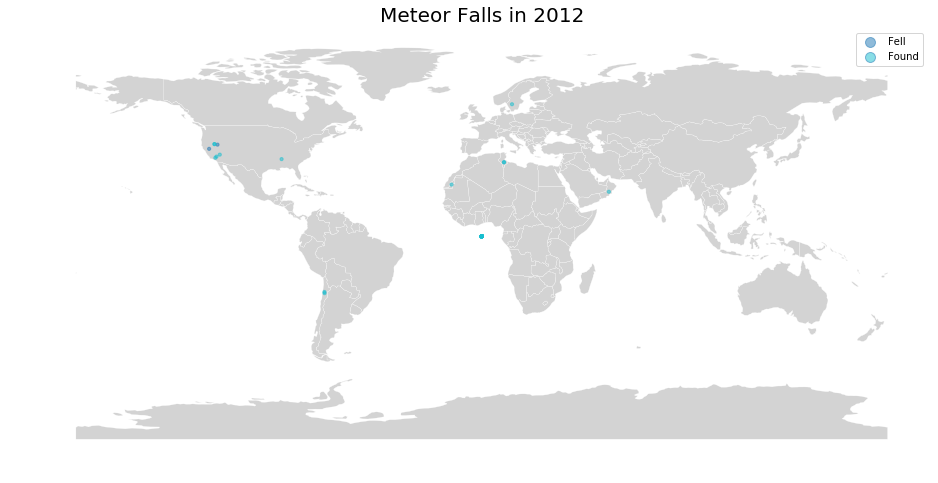

In [7]:

ax = world.plot(figsize=(16,10), linewidth=0.25, edgecolor='white', color='lightgrey')

# Notice how we're specifying only a single year in this line! 
plot_single_year = geo_landings[geo_landings.year.dt.year == 2012]

plot_single_year.plot(ax=ax, column='fall', alpha = 0.5, markersize=10, legend=True)
plt.title("Meteor Falls in 2012", size = 20)
ax.axis('off')
plt.show()

Feel free to change the code above to look at any year you like in order to get comfortable with the syntax. You may have noticed that there is a peculiar point off the coast of Africa in the Atlantic ocean. Let's take a closer look at what's going on there in the cell below. 

In [8]:
# Here we're looking at the last 10 entries of our dataframe
plot_single_year.tail(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,geometry
30765,Northwest Africa 7842,57415,Valid,H6,365.0,Found,2012-01-01,0.00000,0.00000,"(0.000000, 0.000000)",POINT (0 0)
30766,Northwest Africa 7843,57416,Valid,H5,236.0,Found,2012-01-01,0.00000,0.00000,"(0.000000, 0.000000)",POINT (0 0)
30767,Northwest Africa 7850,57417,Valid,H5,625.0,Found,2012-01-01,0.00000,0.00000,"(0.000000, 0.000000)",POINT (0 0)
30768,Northwest Africa 7851,57418,Valid,H4,585.0,Found,2012-01-01,0.00000,0.00000,"(0.000000, 0.000000)",POINT (0 0)
30769,Northwest Africa 7852,57419,Valid,H5,39.0,Found,2012-01-01,0.00000,0.00000,"(0.000000, 0.000000)",POINT (0 0)
30774,Northwest Africa 7860,57424,Valid,H6,500.0,Found,2012-01-01,0.00000,0.00000,"(0.000000, 0.000000)",POINT (0 0)
31060,Österplana 049,56148,Relict,Relict OC,0.0,Found,2012-01-01,58.58333,13.43333,"(58.583330, 13.433330)",POINT (13.43333 58.58333)
36402,Rosamond,57434,Valid,LL3,11.1,Found,2012-01-01,34.82793,-118.14640,"(34.827930, -118.146400)",POINT (-118.1464 34.82793)
37732,Stewart Valley 012,55528,Valid,H6,130.0,Found,2012-01-01,36.23500,-116.18358,"(36.235000, -116.183580)",POINT (-116.18358 36.235)
38107,Tupelo,56551,Valid,EL6,280.0,Found,2012-01-01,34.24216,-88.77594,"(34.242160, -88.775940)",POINT (-88.77594000000001 34.24216)


Ah ha! There's the problem. In this case the "Northwest Africa" meteorites don't have valid coordinates and were simply zero filled. This is another case of "poor data" that is not intentionally misleading, but can lead to some strange results if you're not careful. One of the most popular ways to deal with missing data in a lot of cases is to simply replace those missing values with zero, so it's best to be careful. In this case, let's filter those points out so they don't show up in our map.

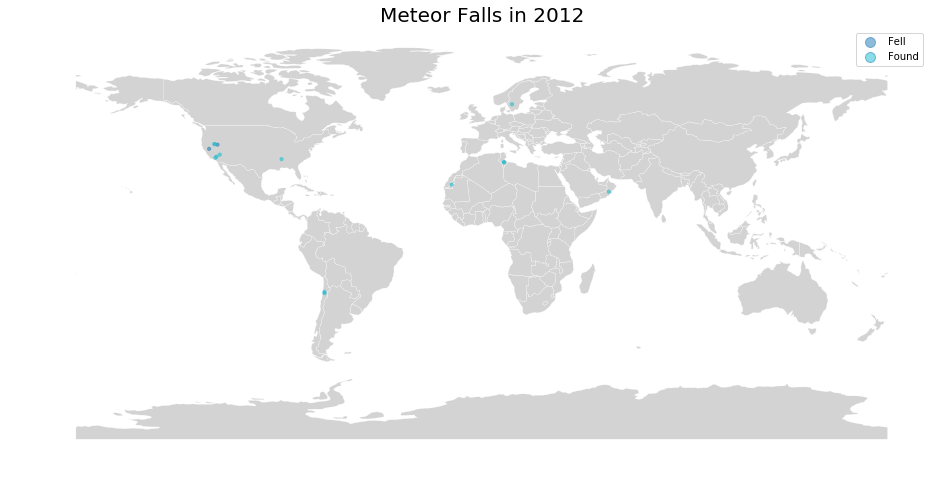

In [9]:

# If you want to have multiple conditions, the syntax is the same, but each condition is separated
# by an ampersand (&) for 'and'. Also note that '!=' means "not equal to" 

ax = world.plot(figsize=(16,10), linewidth=0.25, edgecolor='white', color='lightgrey')
# Note the changes in the line below
plot_single_year = geo_landings[(geo_landings.year.dt.year == 2012) & (geo_landings.reclat != 0)]

plot_single_year.plot(ax=ax, column='fall', alpha = 0.5, markersize=10, legend=True)
plt.title("Meteor Falls in 2012", size = 20)
ax.axis('off')
plt.show()

There we go! That took care of that peculiar landing sight (far) off the coast of Africa. Now that we can create maps with single a years  data, let's put it all into a interactive widget so we can view any year conveniently. 

## Putting it in a widget

In the cell below we're creating the widget that we can use to view any year we like. The code here appears intimidating, but it's about 95% comments explaining what's going on. The actual code for the widget is but a pittance at approximately 12 lines of code!

In [10]:
'''
This function is actually nothing new! Instead of plotting our graph directly, we've hidden it 
in a function to call instead. We've also called it 'update' as it is the function that will update
our plot with new data. In this case, our function takes a single input 'y' for year, this is the input 
that is used to filter our data down to a single year. But, everything in the function below is exactly
the plots we've already used. 
'''
def update(y):
    ax = world.plot(figsize=(20,10), linewidth=0.25, edgecolor='white', color='lightgrey')
    
    # Notice how we're specifying the year exactly as we did before, now we're just using
    # the variable 'y' to select the year instead!
    geo_landings[(geo_landings.year.dt.year == y) & (geo_landings.reclat !=0)].plot(alpha=0.75, 
                                                                                    ax=ax,
                                                                                    column = "fall",
                                                                                    legend = True)
    plt.title("Meteorite Falls in " + str(int(y)), size = 20)
    ax.axis('off')
    plt.show()

'''
Here we're simply finding and sorting all the years which had meteorites fall. Here's a quick overview
of what each funciton is doing below, as there's actually a lot to digest in that short line. 

sorted() : This function sorts data in ascending order (smallest -> middlest -> biggest) 
           If it is not simply numerical data, it will be sorted alphanumerically. 
           
list()   : This function simply turns what is inside parenthesis into a python list

landings.year.dt.year.unique() : We've actually seen this before to extract just the year. However this
                                 time we've also added the .unique() method. This returns a filtered list 
                                 of only the unique years that meteorites were observed to fall or found. 
                                   
[:-1]  : This is a short hand to parse our list. In this case the colon specifies that we're taking 
         elements from the beginning of the list. The -1 like this specifies that we're taking the 
         whole list, with the exception of the final element. This is because the year in the final 
         element has an error, and our widget won't work at that point. 
'''

years_with_fall = sorted(list(landings.year.dt.year.unique()))[:-1]


'''
The contents of this code is explained below.

interact_manual             : This is the function that we imported earlier that allows us to create an interactive
                              widget taht will help us explore the data. The _manual suffix tells us that we also
                              want to create a button to only update our plot when we've found the year we desire. 
                  
update                      : This is the function we defined at the beginning of the cell, and the function that 
                              interact will continuously update for us. 

y = widgets.SelectionSlider : This is the widget that we will be using to pass values to our 'update' function. 
                              Notice how we have used the name 'y', the same argument that our update() parameter
                              takes. In this case, SelectionSlider specifies that we want to use a slider widget
                              in order to select the values of y, the year that we're interested in. The arguments
                              of Selection Slider are explaned below. 
                              
description                 : This is a string (computer science talk for "a bunch of text") that will be the label
                              for our slider.
                            
options                     : This is a list of values our slider can take. In ourcase, it is the list we created 
                              earlier where we know meteors have fallen. 
'''

interact_manual(update, 
         y=widgets.SelectionSlider(description='Select Year', 
                                   options=years_with_fall))

interactive(children=(SelectionSlider(description='Select Year', options=(1688.0, 1766.0, 1769.0, 1803.0, 1805.0, 1806.0, 1814.0, 1822.0, 1835.0, 1836.0, 1838.0, 1842.0, 1855.0, 1858.0, 1860.0, 1865.0, 1869.0, 1873.0, 1880.0, 1883.0, 1886.0, 1895.0, 1896.0, 1898.0, 1899.0, 1900.0, 1902.0, 1908.0, 1914.0, 1919.0, 1920.0, 1922.0, 1923.0, 1925.0, 1929.0, 1930.0, 1932.0, 1933.0, 1934.0, 1938.0, 1939.0, 1942.0, 1945.0, 1949.0, 1950.0, 1951.0, 1952.0, 1954.0, 1957.0, 1959.0, 1968.0, 1969.0, 1971.0, 1974.0, 1976.0, 1977.0, 1981.0, 1984.0, 2001.0, 2002.0, 2008.0, nan, 1704.0, 1715.0, 1716.0, 1723.0, 1724.0, 1740.0, 1741.0, 1749.0, 1750.0, 1751.0, 1753.0, 1768.0, 1773.0, 1775.0, 1776.0, 1779.0, 1781.0, 1784.0, 1785.0, 1787.0, 1790.0, 1791.0, 1792.0, 1793.0, 1794.0, 1795.0, 1796.0, 1797.0, 1798.0, 1801.0, 1804.0, 1807.0, 1808.0, 1809.0, 1810.0, 1811.0, 1812.0, 1813.0, 1815.0, 1817.0, 1818.0, 1819.0, 1820.0, 1821.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1837.0, 1839.0, 1840.0, 1841.0, 1843.0, 1844.0, 1845.0, 1846.0, 1847.0, 1848.0, 1849.0, 1850.0, 1851.0, 1852.0, 1853.0, 1854.0, 1856.0, 1857.0, 1859.0, 1861.0, 1862.0, 1863.0, 1864.0, 1866.0, 1867.0, 1868.0, 1870.0, 1871.0, 1872.0, 1874.0, 1875.0, 1876.0, 1877.0, 1878.0, 1879.0, 1881.0, 1882.0, 1884.0, 1885.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1897.0, 1901.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1915.0, 1916.0, 1917.0, 1918.0, 1921.0, 1924.0, 1926.0, 1927.0, 1928.0, 1931.0, 1935.0, 1936.0, 1937.0, 1940.0, 1941.0, 1943.0, 1944.0, 1946.0, 1947.0, 1948.0, 1953.0, 1955.0, 1956.0, 1958.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1970.0, 1972.0, 1973.0, 1975.0, 1978.0, 1979.0, 1980.0, 1982.0, 1983.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0), value=1688.0), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

<function __main__.update>

We note that you'll have to click "Run Interact" after adjusting your slider to the year of your choice. We've demonstrated how straight forward it is to create an interactive widget using Jupyter. If you want to learn more, the documentation for widgets is available [at this link](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html). Note that this link goes to the "basics" tutorial of the documentation, rather than the home page. 





# Conclusion

This notebook demonstrated how to work with open data sets that contain a geo-spacial component. Specifically, we've shown you how to create maps using this data.  We also demonstrated how you might add a small slice of interactivity to see meteorite falls at any given year. In the next tutorial, we will dive deeper in to the data analysis and see if we can discover anything interesting hidden within the data.  

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)